<a href="https://colab.research.google.com/github/vijaykumar247/AV-Hackathon/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structure of Notebook

1. Problem Statement
2. Loading Libraries and Data
3. Data Preprocessing(Outliers & Missing values)
4. Feature extraction and exploration
5. Training and Validation data
6. Time Series Forecasting models
7. Machine Learning models

# 1.Problem Statement



Unicorn Investors JetRail are planning to invest in new form of transportation. 
JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
  
 They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. 
 You are provided with traffic data of JetRail since inception in the test file.

 Objective:
 Forecast the traffic for next 7 months.

# 2. Loading the Libraries and Data

### 2.1 Importing Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Evaluation metrics
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from math import sqrt
from statistics import mean, stdev

import warnings
warnings.filterwarnings('ignore')

### 2.2 Importing Datasets

In [ ]:
# Loading the Train Dataset
from google.colab import files
uploaded_1=files.upload()


Saving Train_SU63ISt.csv to Train_SU63ISt (1).csv


In [ ]:
import io
cols = ['Datetime', 'Count']
df_train = pd.read_csv(io.BytesIO(uploaded_1["Train_SU63ISt.csv"]), parse_dates=['Datetime'], usecols=cols)
df_train.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [ ]:
df_train[::-1].head()

,Datetime,Count
18287,2014-09-25 23:00:00,534
18286,2014-09-25 22:00:00,580
18285,2014-09-25 21:00:00,702
18284,2014-09-25 20:00:00,732
18283,2014-09-25 19:00:00,868


Data Range is from 25-08-2012 to 25-09-2014

In [ ]:
# Dimensionality of the data
df_train.shape

(18288, 2)

In [ ]:
# Loading the Test Dataset
from google.colab import files
uploaded_2=files.upload()

Saving Test_0qrQsBZ.csv to Test_0qrQsBZ.csv


In [ ]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded_2["Test_0qrQsBZ.csv"]), parse_dates=['Datetime'])
df_test.head(), df_test.shape

(      ID            Datetime
 0  18288 2014-09-26 00:00:00
 1  18289 2014-09-26 01:00:00
 2  18290 2014-09-26 02:00:00
 3  18291 2014-09-26 03:00:00
 4  18292 2014-09-26 04:00:00, (5112, 2))

# 3. Preprocessing Data

### Plotting Dataset

In [ ]:
# Check the datatype
type(df_train.index)

pandas.core.indexes.range.RangeIndex

In [ ]:
# Creating Date column as index
df_train.index=df_train['Datetime']

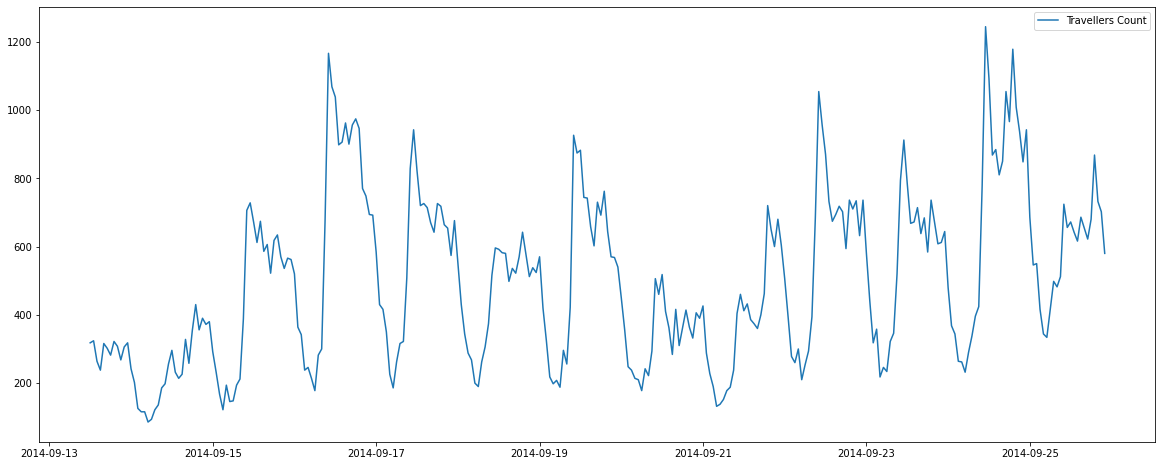

In [ ]:
# Plotting the dataset
plt.figure(figsize=(20,8))

plt.plot(df_train.index[ -300:-1], df_train['Count'][-300:-1], label='Travellers Count')
plt.legend(loc='best')
plt.show()

- Clearly there are some very high values in the data. 
- Could this be around holiday season like new year's? Let us find out

### 3.2 Outliers in Dataset

In [ ]:
df_train['Count'].describe()

count    18288.000000
mean       138.958115
std        153.467461
min          2.000000
25%         22.000000
50%         84.000000
75%        210.000000
max       1244.000000
Name: Count, dtype: float64

In [ ]:
df_train[df_train['Count']==np.max(df_train['Count'])]

,Datetime,Count
Datetime,,
2014-09-24 11:00:00,2014-09-24 11:00:00,1244


In [ ]:
df_train[df_train['Count']==np.min(df_train['Count'])]

,Datetime,Count
Datetime,,
2012-08-25 01:00:00,2012-08-25 01:00:00,2
2012-08-25 03:00:00,2012-08-25 03:00:00,2
2012-08-25 04:00:00,2012-08-25 04:00:00,2
2012-08-25 05:00:00,2012-08-25 05:00:00,2
2012-08-25 06:00:00,2012-08-25 06:00:00,2
...,...,...
2013-12-11 16:00:00,2013-12-11 16:00:00,2
2013-11-15 04:00:00,2013-11-15 04:00:00,2
2013-11-15 05:00:00,2013-11-15 05:00:00,2


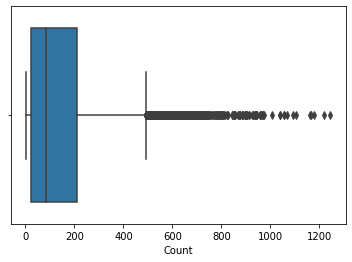

In [ ]:
# Boxplot
sns.boxplot(df_train['Count'])

In [ ]:
IQR = (np.percentile(df_train['Count'], 75) - np.percentile(df_train['Count'], 25))
whisker_val = (np.percentile(df_train['Count'], 75)) + (1.5*IQR)
whisker_val

492.0

In [ ]:
df_train[df_train['Count']>whisker_val]

,Datetime,Count
Datetime,,
2013-08-15 22:00:00,2013-08-15 22:00:00,598
2013-08-15 23:00:00,2013-08-15 23:00:00,732
2013-11-21 18:00:00,2013-11-21 18:00:00,628
2013-03-12 17:00:00,2013-03-12 17:00:00,554
2014-11-03 20:00:00,2014-11-03 20:00:00,494
...,...,...
2014-09-25 19:00:00,2014-09-25 19:00:00,868
2014-09-25 20:00:00,2014-09-25 20:00:00,732
2014-09-25 21:00:00,2014-09-25 21:00:00,702


- We can use either the 95th percentile value or whisker value to select outliers
- There are 681 points greater than whisker value
- Replace the outliers with bfill or ffill

### 3.3 Replacing values with Nan whose values are more than whisker value

In [ ]:
df_original = df_train.copy()

# Replacing all outliers with Nan values
df_train['Count'] = df_train['Count'].apply(lambda x : np.nan if x > whisker_val else x)

In [ ]:
# Check the missing values
df_train['Count'].isnull().sum()

681

In [ ]:
# removing outliers with ffill
df_train['Count']=df_train['Count'].fillna(whisker_val)

df_train['Count'].isnull().sum()

0

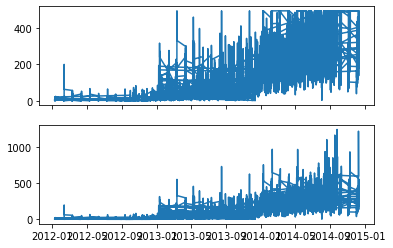

In [ ]:
# Plot the original and preprocessed data
fig, axs = plt.subplots(2, 1,  sharex=True)

axs[0].plot(df_train['Count']) 
axs[1].plot(df_original['Count'])
  
plt.show() 

There is change in the plot after outliers have been replaced with whisker values

## 4. Feature Extraction

### 4.1 Decompose *Series*

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_series = seasonal_decompose(df_train['Count'], model='additive', freq= 24)

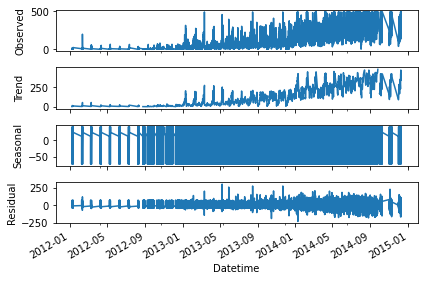

In [ ]:
# Plotting the Trend, Seasonality, Residual plots
decomposed_series.plot()
plt.show()

Trend - Positive trend with time 

Seasonality - There is repeating pattern in the data

Residual - There are few variations/random spikes in the data 

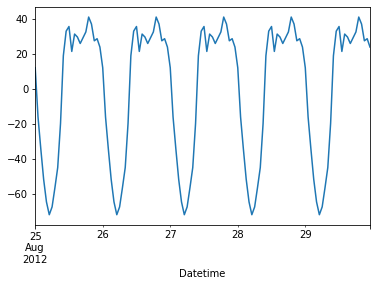

In [ ]:
# Plotting the Seasonality curve for better view
decomposed_series.seasonal[0:120].plot()

- Pattern repeats everyday
- This suggests daily seasonality in the data

### 4.2 Adding New Features

In [ ]:
# Adding new features to the data
df_train_nf = pd.DataFrame({"year" : df_train['Datetime'].dt.year,
                            "quarter": df_train['Datetime'].dt.quarter,
                            "month" : df_train['Datetime'].dt.month,
                            "week": df_train['Datetime'].dt.week,
                            "dayofyear": df_train['Datetime'].dt.dayofyear,
                            "dayofmonth" : df_train['Datetime'].dt.day,
                            "weekday" : df_train['Datetime'].dt.dayofweek,
                            "weekday_name":df_train['Datetime'].dt.strftime("%A"),
                            "hour" : df_train['Datetime'].dt.hour
})

# View the dataset
df_train_nf.head()

,year,quarter,month,week,dayofyear,dayofmonth,weekday,weekday_name,hour
Datetime,,,,,,,,,
2012-08-25 00:00:00,2012,3,8,34,238,25,5,Saturday,0
2012-08-25 01:00:00,2012,3,8,34,238,25,5,Saturday,1
2012-08-25 02:00:00,2012,3,8,34,238,25,5,Saturday,2
2012-08-25 03:00:00,2012,3,8,34,238,25,5,Saturday,3
2012-08-25 04:00:00,2012,3,8,34,238,25,5,Saturday,4


In [ ]:
# Concate the Original data with the newly created dataset which has new features
df_train_final = pd.concat([df_train_nf, df_train['Count']], axis=1)

df_train_final.head()

,year,quarter,month,week,dayofyear,dayofmonth,weekday,weekday_name,hour,Count
Datetime,,,,,,,,,,
2012-08-25 00:00:00,2012,3,8,34,238,25,5,Saturday,0,8.0
2012-08-25 01:00:00,2012,3,8,34,238,25,5,Saturday,1,2.0
2012-08-25 02:00:00,2012,3,8,34,238,25,5,Saturday,2,6.0
2012-08-25 03:00:00,2012,3,8,34,238,25,5,Saturday,3,2.0
2012-08-25 04:00:00,2012,3,8,34,238,25,5,Saturday,4,2.0


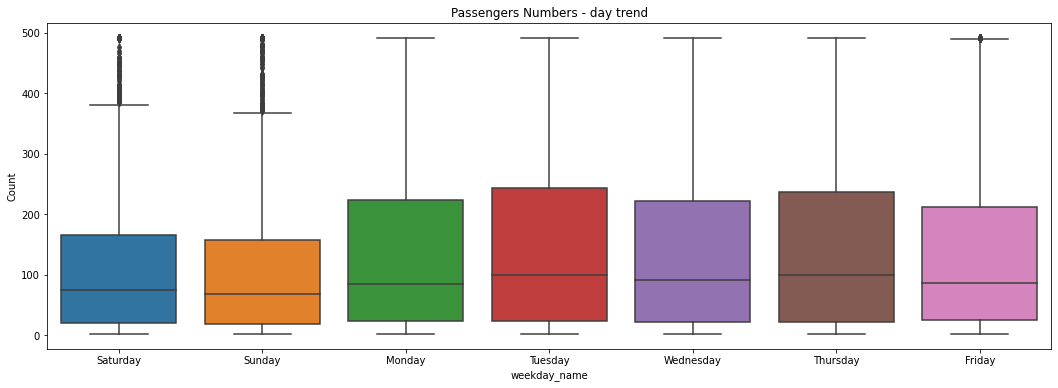

In [ ]:
# Box plot for weekly passenegers number
plt.figure(figsize=(18,6))

sns.boxplot(x=df_train_final['weekday_name'], y=df_train_final['Count'], )
plt.title("Passengers Numbers - day trend")

plt.show()


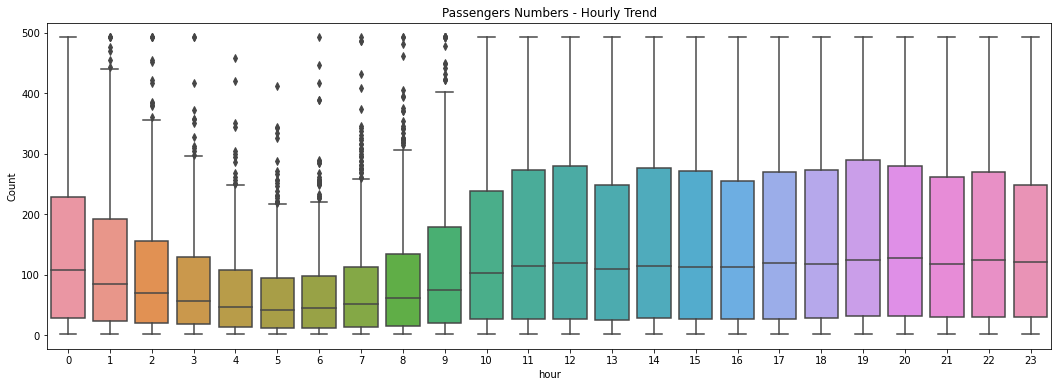

In [ ]:
# Box plot for Hourly passenegers number
plt.figure(figsize=(18,6))

sns.boxplot(x=df_train_final['hour'], y=df_train_final['Count'], )
plt.title("Passengers Numbers - Hourly Trend")

plt.show()

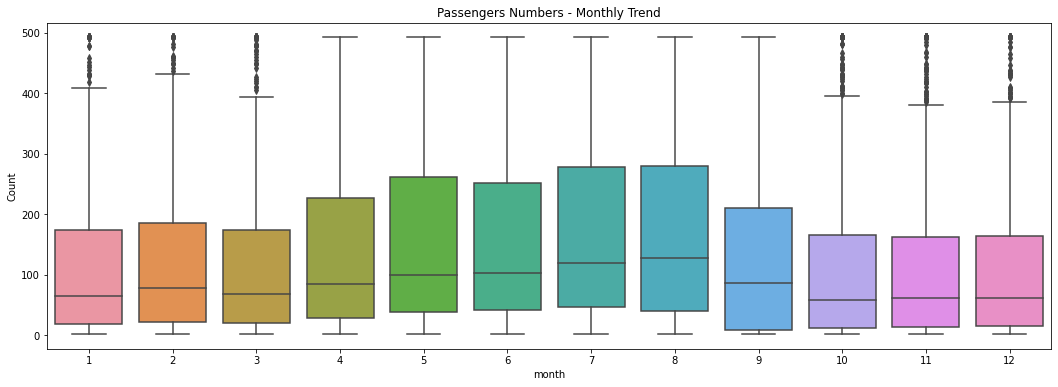

In [ ]:
# Box plot for Monthly passenegers number
plt.figure(figsize=(18,6))

sns.boxplot(x=df_train_final['month'], y=df_train_final['Count'], )
plt.title("Passengers Numbers - Monthly Trend")

plt.show()

# 5. Training and Validation Data

### 5.1 Dividing the dataset - Train and validation datasets

13716.0

In [ ]:
# 75% of train data and 25% of Valid Data
# creating the train and valid dataset
train_data = df_train_final[0:13728]
valid_data = df_train_final[13728:]

train_data.tail()

,year,quarter,month,week,dayofyear,dayofmonth,weekday,weekday_name,hour,Count
Datetime,,,,,,,,,,
2014-03-19 19:00:00,2014,1,3,12,78,19,2,Wednesday,19,256.0
2014-03-19 20:00:00,2014,1,3,12,78,19,2,Wednesday,20,228.0
2014-03-19 21:00:00,2014,1,3,12,78,19,2,Wednesday,21,208.0
2014-03-19 22:00:00,2014,1,3,12,78,19,2,Wednesday,22,242.0
2014-03-19 23:00:00,2014,1,3,12,78,19,2,Wednesday,23,200.0


In [ ]:
valid_data.head()

,year,quarter,month,week,dayofyear,dayofmonth,weekday,weekday_name,hour,Count
Datetime,,,,,,,,,,
2014-03-20 00:00:00,2014,1,3,12,79,20,3,Thursday,0,154.0
2014-03-20 01:00:00,2014,1,3,12,79,20,3,Thursday,1,124.0
2014-03-20 02:00:00,2014,1,3,12,79,20,3,Thursday,2,130.0
2014-03-20 03:00:00,2014,1,3,12,79,20,3,Thursday,3,90.0
2014-03-20 04:00:00,2014,1,3,12,79,20,3,Thursday,4,80.0


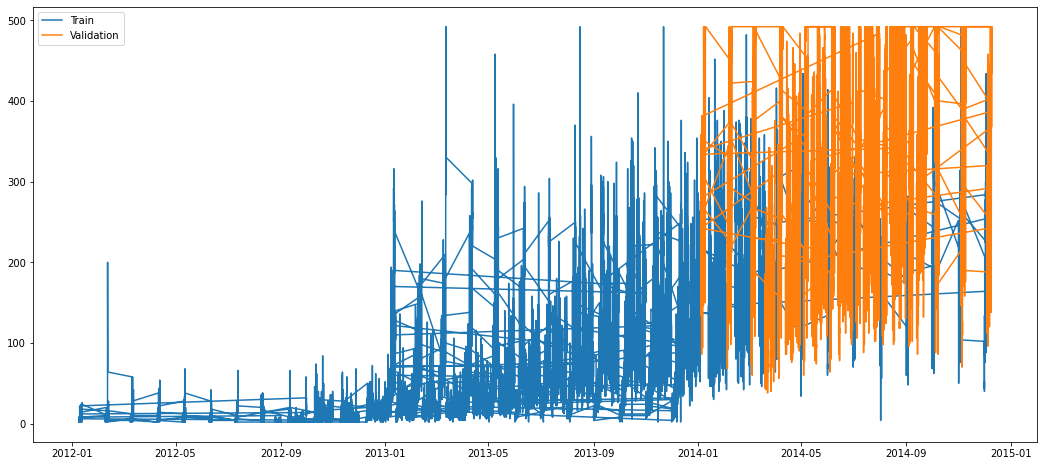

In [ ]:
plt.figure(figsize=(18,8))

plt.plot(train_data.index, train_data['Count'], label='Train')
plt.plot(valid_data.index, valid_data['Count'], label='Validation')
plt.legend(loc='best')
plt.show()

In [ ]:
# Creating a custom function to calculate rmsle error
def rmsle(actual, preds):
  for i in range(0, len(preds)):
    if preds[i]<0:
      preds[i]=0
    else:
      pass

  error = (sqrt(mean_squared_log_error(actual, preds)))*100
  return error    


  # Define RMSE function
  def rmse(actual,preds):
    for i in range(0, len(preds)):
      if preds[i]<0:
        preds[i]=0
      else:
        pass
    
    error=(sqrt(mean_squared_error(actual,preds))) *100
    return error       

### 5.2 Stationarity Test

In [ ]:
# ADF and KPSS tests to check if series is stationary or non-stationary
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
# Function for customised display of ADF tests
def adf_kpss_test(timeseries, test='adf'):

  if test == 'adf':
    # Perform Dickey-Fuller Test
    print("Results of ADF Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', '#Lags used', 'Number of records'])

    for key, value in dftest[4].items():
      dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput) 

  elif test=='kpss':
      # Perform Dickey-Fuller Test
    print("Results of KPSS Test:")
    dftest = kpss(timeseries, regression='c')
    dfoutput = pd.Series(dftest[0:3], index=['Test statistic', 'p-value', '#Lags used'])

    for key, value in dftest[3].items():
      dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput) 




In [ ]:
adf_kpss_test(train_data['Count'], test='adf')

Results of ADF Test:
Test statistic             -5.579779
p-value                     0.000001
#Lags used                 42.000000
Number of records       13685.000000
Critical Value (1%)        -3.430828
Critical Value (5%)        -2.861751
Critical Value (10%)       -2.566882
dtype: float64


 If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary). 
 
 **Here test statistic is < than critical and p-value is < 0.05 significance level. Hence series is stationary**

In [227]:
adf_kpss_test(train_data['Count'], test='kpss')

Results of KPSS Test:
Test statistic           26.725732
p-value                   0.010000
#Lags used               42.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


 If the test statistic is greater than the critical value, we fail to reject the null hypothesis (aka the series is trend stationary). When the test statistic is lesser than the critical value, we reject the null hypothesis (which means the series is non-stationary).
 
  **Here test statistic is > than critical and p-value is < 0.05. Hence series is trend stationary**

# 6. Time Series Forecasting Models

### 6.1 SARIMA Model